# Imbalanced Learning

**Author:** [Dr. Robert Lyon](http://www.scienceguyrob.com)

**Contact:** robert.lyon@manchester.ac.uk

**Institution:** University of Manchester

**Affiliation:** SKA Group, Time Domain Team (TDT)

**Version:** 1.0

**Date: 11/04/2018**

**Acknowledgements:** This notebook utilises data obtained by the High Time Resolution Universe Collaboration using the Parkes Observatory, funded by the Commonwealth of Australia and managed by the CSIRO. The data was originally processed by Dr. Daniel Thornton & Dr. Samuel Bates. I gratefully acknowledge their efforts. 

I make use of a Python library called $\textrm{imblanced-learn}$ in this notebook. This was written by Guillaume Lemaître, Fernando Nogueira and Christos Aridas as part of their work,

_"Imbalanced-learn: A Python Toolbox to Tackle the Curse of Imbalanced Datasets in Machine Learning", Journal of Machine Learning Research (JLMR), vol.18, number 17, 2017._

Their work can be found [via the JLMR website](http://jmlr.org/papers/v18/16-365).

I greatly appreciate their efforts.

## Introduction
This notebook explores the Imbalanced Learning Problem, that reduces the accuracy of Machine Learning (ML) algorithms. It was written to support a talk I delivered at European Week of Astronomy and Space Science (EWASS) meeting in 2018. The talk is entitled: 

*Imbalanced Learning In Astronomy*

The notebook dissects the class imbalance problem through interactive Python code (Python version 3.6). I explore the key concepts and issues via a tutorial style. To run the code you require the $\textrm{numpy}$, $\textrm{scipy}$, $\textrm{scikit-learn}$, and $\textrm{imbalanced-learn}$ libraries. The notebook assumes some basic background knowledge in statistics and machine learning, but is pitched at a general astronomy audience that may have limited ML experience.

## Code & License
The code and the contents of this notebook are released under the GNU GENERAL PUBLIC LICENSE, Version 3, 29 June 2007. The images are exempt from this, as some are used in publications I've written in the past. If you'd like to use the images please let me know, and I'll sort something out.

## Citation Request

I kindly request that if you make use of the notebook, please cite the work using the following $\textrm{Bibtex}$ source.


## Machine Learning

ML is a branch of artificial intelligence (A.I.), concerned with replicating and improving upon the human ability to learn. ML is comprised of multiple sub-fields, each supported by extremely active research communities. Here we are concerned with applying the tools from a specific area of ML known as pattern recognition - also known as statistical classification. The goal of classification is to automatically categorise items, objects, and data points, as accurately as possible. Human beings are capable of undertaking sophisticated classification tasks with ease, given appropriate training. This is due to our innate ability to categorise via trial and error. ML algorithms learn in a similar way, however using statistical tools (see Bishop 2006, and Lyon 2016 for a review).

The aim of classification is to build functions that accurately map a set of input data points, to a set of **class** labels. This means mapping each input example to it's correct **label**. If $X=\lbrace x_{\rm 1}, \ldots , x_{\rm n} \rbrace $ represents an input dataset, then $x_{\rm i}$ is an individual example represented by variables known as **features**. Features describe the characteristics of an example such that $x_{\rm i} = \lbrace x_{\rm i}^{\rm j},...,x_{\rm i}^{\rm m} \rbrace$, where each feature $x_{\rm i}^{\rm j} \in \mathbb{R}$ for $j=1, \ldots , m$. 

The **class label** $y$ is also associated with each example. This can take many possible values so long as $y \in Y$. The class label can be numerical or textual. Though typically each $y$ is an integer value correpsonding to some class category where $y \in Y=\lbrace y_{\rm 1}, \ldots, y_{\rm k} \rbrace$. It is common for only binary labels to be considered such that $y\in Y=\lbrace -1,1 \rbrace$. Where $y_{\rm 1}=-1$ equates to the non-target class (synonymous with negative) and $y_{\rm 2}=1$ to target class (synonymous with positive). In the pulsar domain, we consider the pulsar class to be the target (positive), and all others (noise, interference) to be non-target (negative)

The features used to describe examples must be chosen after careful consideration. Features must be useful for separating the classes under consideration. For the **binary** two-class case, assuming only positive and negative classes, the feature distributions for examples with the label $y_{\rm 1}=-1$ must differ from the distributions for examples with the label $y_{\rm 1}=1$. These distributions must be separable, which can be quantified mathematically, i.e. via distance measures. Feature separability is depicted in the image below according to individual features. Here $\phi$ depicts an optimal separation between the classes.


<img src="images/png/Split_Point_1.png" width="500">

An ML function 'learns' to separate examples from different classes, using the feature data from a labelled input vector known as the **training set** $T_{train}$. It contains pairs such that $T_{train}=\lbrace (x_{\rm 1},y_{\rm 1}),\ldots,(x_{\rm n},y_{\rm n})\rbrace$. 

Think of the training set as the information available to a student prior to an examination. This information must be descriptive, (i.e. the features must contain useful information), and reflect what the topic of the exam. A classifier induces a mapping function between examples and labels based on the data in $T_{train}$. It does this by attempting to minimise the mapping errors it makes on the training examples. This process is known as **'training'**. 

The trained function is used to label new **unseen** candidates in the **'test set'** $T_{test}$. The test should be a sample of independent examples used to test the trained classifier, or the real world data the classifier is asked to classify. 

## Imbalanced Learning Problem

For binary classification problems, the class skew can be characterised by the imbalance ratio $IR$,

\begin{eqnarray}
IR & = & \frac{|\lbrace (x_{i},y_{i}) | y_{i} \in Y \land y_{i}=y_{1} \rbrace |}{|\lbrace (x_{i},y_{i}) | y_{i} \in Y \land y_{i}=y_{2} \rbrace |} \textrm{.}
\end{eqnarray}

Here $y_{1}$ is the minority class such that $0 < | y_{1} | < | y_{2}| $, and $y_{2}$ is therefore the majority class.

Algorithms trained upon such data exhibit two general properties:
* High training accuracy as the $IR$ approaches zero, where the cardinality of the majority class approaches infinity. This is achievable, since the majority class examples form an increasingly large proportion of the training set. Therefore the strategy that yields the greatest reduction in training set error, involves always predicting the majority class label. Thus classification models trained on such data, can become biased towards the majority class.
* Poor minority class generalisation performance, particularly with respect to recall. Given that the training set is so imbalanced, $P(y_{1}|x_{i})$ (probability of $y_{1}$ for $x_{i}$) approaches zero as $\lim_{IR} \to 0$. In such cases $y_{1}$ is rarely if ever predicted.

These are effects of what is known as the imbalanced learning problem. Imbalanced learning is concerned with overcoming these issues, in data sets that exhibit severe class imbalances where $IR < 0.1$ and worse. There are many discernible types of data imbalance that cause such problems (see He & Garcia, 2009). There are i) **intrinsic imbalances**, which are caused by the nature of the data space. There are ii) **extrinsic imbalances** caused by data collection techniques, and perhaps not attributable to a naturally imbalanced data distribution. Then there are iii) **relative imbalances**, occurring when a minority class is not rare, just small relative to the majority class. Whilst iv) **absolute rarity** pertains to situations where the minority class instances are genuinely rare, which naturally makes learning difficult. Finally there may be v) **sub-class imbalances**, whereby a single class is made up of numerous distinct subclasses, that are themselves imbalanced in one of the ways already described.

Training a classifier on an imbalanced dataset does not necessarily mean poor generalisation performance. If the training data are discriminative enough to separate the different classes in data space, then the classifier will perform well regardless of the imbalance. A contrived example of this is shown in the image below.


<img src="images/png/NoImbalanceProblem.png" width="400">

It demonstrates that the underlying class distribution alone is not the root cause of poor performance on imbalanced data. Rather it is characteristics often possessed by imbalanced data sets, that make it difficult for a classifier to separate the minority and majority classes. These include,

* **class inseparability**, which describes the overlapping nature of data from different classes. See a) in the image below.
* **small disjuncts**, which occur when a concept is comprised of smaller disconnected sub-concepts. Small disjuncts are a problem as they cover only a few training cases. Many training examples are therefore usually required to characterise all the individual disjuncts. See b) in the image below.
* the **small sample size** problem, which occurs when there are too few minority class examples available for learning. See c) in the image below.

Ultimately these characteristics conspire to make it difficult for a classifier to construct an optimal decision boundary, leading to sub-optimal classifier performance.


<img src="images/png/Imbalance_no_axis.png" width="400">

## Solutions

There are three generic approaches used to tackle a classification task. 

* Methods that assign labels to examples, according to their distance from some cluster centre. This is shown in a) below.
* Methods that attempt to separate classes using decision boundaries. Class labels are assigned according to which side an example falls upon. Typically requires a region in data space that has a low density of examples, through which the boundary can be drawn. This is shown in b) below. 
* Instance-based methods,  that assign labels to new examples according to the majority label of their $n$ nearest neighbours. This is shown in c) below, via a typical nearest neighbour approach.

There are other approaches, but these suffice for now.

<img src="images/png/LearningAssumptions.png" width="300">

For each of these approaches, there are many ways to overcome the problems associated with class imbalance. Here we consider the most generic, often very succesfully applied.

### Random Under-sampling

In Random Under-sampling (RUS), majority class are instances are randomly omitted from the data set to balance the class distribution. Suppose we begin with data as shown in the image below.

<img src="images/png/UndersampleBefore.png" width="200">

The goal is to randomly under-sample producing a more balanced data set:

<img src="images/png/UndersampleAfter.png" width="200">

Next let's create some imbalanced data to play with. We'll create a reasonable imbalance first. We'll use a 1:20 ratio, i.e. there are 20 majority class examples for each minority class example. In total 800 examples will be created.

/Users/rob/anaconda/envs/py36/lib/python3.6/site-packages/sklearn/utils/deprecation.py:75: DeprecationWarning: Function _ratio_float is deprecated; Use a float for 'ratio' is deprecated from version 0.2. The support will be removed in 0.4. Use a dict, str, or a callable instead.
  warnings.warn(msg, category=DeprecationWarning)


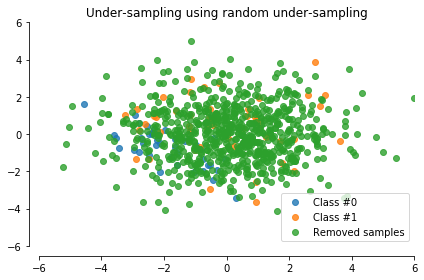

Size of the variables involved
y length:  800
X length:  800
y resampled length:  90
x resampled length:  90


In [7]:
# This is a modified version of the code originally 
# written by Christos Aridas and Guillaume Lemaitre
# <g.lemaitre58@gmail.com>, released under the MIT
# License.

# Plotting library.
import matplotlib.pyplot as plt

# For some math we need to do.
import numpy as np

# Use the Sklearn library to make datasets,
# and perform an anlysis.
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA

# The code that actually does the random undersampling.
from imblearn.under_sampling import RandomUnderSampler

# Generate a dataset to experiment with. Here I explain what this
# function does, and what the parameters mean on their first use. 
# Where I use them elsewhere, return to here for a recap.
# 
# n_classes : int, optional (default=2)
# The number of classes (or labels) of the classification problem.
#
# class_sep : float, optional (default=1.0)
# The factor multiplying the hypercube size. Larger values spread
# out the clusters/classes and make the classification task easier.
#
# weights : list of floats or None (default=None)
# The proportions of samples assigned to each class. If None, then
# classes are balanced. Note that if len(weights) == n_classes - 1, 
# then the last class weight is automatically inferred. More than
# n_samples samples may be returned if the sum of weights exceeds 1.
#
# n_informative : int, optional (default=2)
# The number of informative features. Each class is composed of a
# number of gaussian clusters each located around the vertices of
# a hypercube in a subspace of dimension n_informative. For each
# cluster, informative features are drawn independently from 
# N(0, 1) and then randomly linearly combined within each cluster
# in order to add covariance. The clusters are then placed on the 
# vertices of the hypercube.
# 
# n_redundant : int, optional (default=2)
# The number of redundant features. These features are generated
# as random linear combinations of the informative features.
#
# flip_y : float, optional (default=0.01)
# The fraction of samples whose class are randomly exchanged.
# Larger values introduce noise in the labels and make the 
# classification task harder.
#
# n_samples : int, optional (default=100)
# The number of samples.
# 
# random_state : int, RandomState instance or None, optional (default=None)
# If int, random_state is the seed used by the random number 
# generator; If RandomState instance, random_state is the 
# random number generator; If None, the random number generator 
# is the RandomState instance used by np.random.
#
# For more details of this sklearn function, visit:
# 
# http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html

X, y = make_classification(n_classes=2, class_sep=1, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20  , n_clusters_per_class=1,
                           n_samples=800  , random_state=10)

# So now have a dataset to play with...

# Build a PCA object for visualisation. PCA decomposes a dataset
# of high dimensionality, into one of low dimensionality. It converts
# a set of observations of possibly correlated variables into a set
# of values of linearly uncorrelated variables called principal components.
#
# See https://en.wikipedia.org/wiki/Principal_component_analysis
# for more details.
pca = PCA(n_components=2)

# Now we have data reduced to just 2 principal components - this makes
# it much easier to plot (can't plot high dimensionality data!).

# Fit and transform x to visualise inside a 2D feature space. What does this 
# mean? It means we take the original data from the higher dimensional space,
# and apply the principal component analysis output, to reduce it to just 2
# dimensions.
#
# For more details of this function checkout,
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html
X_vis = pca.fit_transform(X)

# Now apply the random under-sampling method.
#
# return_indices : bool, optional (default=False)
# Whether or not to return the indices of the samples randomly selected
# from the majority class.
#
# We need the indices of the selected majority class exmaples for plotting.
rus = RandomUnderSampler(ratio=0.8,return_indices=True)

# Produce the resampled data sets for X and Y
X_resampled, y_resampled, idx_resampled = rus.fit_sample(X, y)

# Now apply the same PCA as earlier, to get the reseampled X data,
# in to the 2D space.
X_res_vis = pca.transform(X_resampled)

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0

# Here we add the scatter points for each class, using an alpha
# of 0.8. so they have some transparency.
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

# Build the plot
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

# Make it visible...
plt.title('Under-sampling using random under-sampling')
plt.legend()
plt.tight_layout()
plt.show()

# To help understand whats happened, lets double check the
# sizes of the variables involved.

print ("Size of the variables involved")
print ("y length: ",len(y))
print ("X length: ",len(X))

print ("y resampled length: ",len(y_resampled))
print ("x resampled length: ",len(X_resampled))


But how does under-sampling affect classification performance on this data? There are some experiments we can do. But we also need an evaluation metric insensitive to class skew. 

The G-Mean is not sensitive to class distributions. It describes the ratio of positive to negative accuracy irrespective of class size. We'll use it here along with some other standard metrics.


\begin{equation}
\textrm{G-Mean} = \sqrt{\frac{TP}{TP+FN}\times \frac{TN}{TN+FP}}
\end{equation}

There are two simple experiments to try now.

1. Test how well a simple classifier performs on the original data.
2. Compare that to how well the same classifier performs on the randomly undersampled data.

In [8]:
# We have a couple of relevant data sources. There is,
#
# X - the input data.
# y - the labels corresponding to the examples in X
# X_resampled - the randomly undersampled version of X.
# y_resampled - the labels corresponding to the examples in X_resampled
#
#
# There is then a simple experiment we can do:
#
# 1. Test how well a simple classifier performs on the original data.
# 2. Compare that to how well the same classifier performs on the 
#    randomly undersampled data.
#
# For each test we have to build and evaluate a seaprate classifier.
# For simplicity we use the Naive Bayes classifier, for details see:
# https://en.wikipedia.org/wiki/Naive_Bayes_classifier

# Experiment 1a.

# First lets get our inputs together.
X_before = X
Y_before = y

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_before, Y_before, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - but look a the G-mean... that's very low.")
# You'll notice the custom results are more precise.   


Examples in training set:  400
Examples in testing set:  400
Dimensions of training set:  (400, 20)
Dimensions of testing set:  (400, 20)

Accuracy : 0.945
Recall   : 0.976253298153
Precision: 0.966057441253
F1 Score : 0.971128608924

Custom accuracy:  0.945
Recall   : 0.9660574412532638
Precision: 0.9762532981530343
F1 Score : 0.9711286089238845
G-mean   : 0.6742516343859495

 The outputs should match - but look a the G-mean... that's very low.


Now we determine how under-sampling impacts performance.

In [9]:
# Experiment 2a.
# We do the same as before, except with the undersampled data.

# Let's get our inputs together.
X_after  = X_resampled
Y_after  = y_resampled

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after, Y_after, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - and the G-mean has increased - sampling has made it easier to find the minority class.")
# You'll notice the custom results are more precise. 


Examples in training set:  45
Examples in testing set:  45
Dimensions of training set:  (45, 20)
Dimensions of testing set:  (45, 20)

Accuracy : 0.844444444444
Recall   : 0.84
Precision: 0.875
F1 Score : 0.857142857143

Custom accuracy:  0.8444444444444444
Recall   : 0.875
Precision: 0.84
F1 Score : 0.8571428571428572
G-mean   : 0.8416254115301732

 The outputs should match - and the G-mean has increased - sampling has made it easier to find the minority class.


We see the G-mean improve between experiment 1 and experiment 2. Thus under-sampling has made it easier to identify the minority class. However the results are not great. Accuracy has dropped - but that's ok. You now have to take into consideration that in experiment 1, there were 400 examples in the training set. Whilst in experiment 2, there were only 90 examples. Thus in experiment 2 there was much less information to learn from. The key then is to carefully under-sample, without removing examples that contain a lot of information.

### Random Over-sampling

In Random Over-sampling (RUS), minority class are instances are randomly dupliacted to balance the class distribution. Suppose we begin with data as shown in the image below.

<img src="images/png/Oversample_before.png" width="200">

The goal is to randomly over-sample producing a more balanced data set:

<img src="images/png/OversampleAfter.png" width="200">

So how does this over-sampling affect classification performance? We'll use the G-mean again, and mostly the same code to keep things simple. First we'll create some new data. This time we'll make the imbalanced worse. We'll use a 1:20 ratio, i.e. there are 20 majority class examples for each minority class example. In total 800 examples will be created.

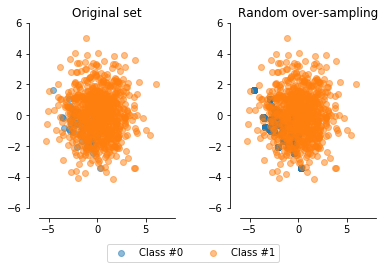

Size of the variables involved
y length:  800
X length:  800
y resampled length:  1520
x resampled length:  1520


In [10]:
# This is a modified version of the code originally 
# written by Christos Aridas and Guillaume Lemaitre
# <g.lemaitre58@gmail.com>, released under the MIT
# License.

# The code that actually does the random oversampling.
from imblearn.over_sampling import RandomOverSampler

# Make a dataset, same as before.
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20  , n_clusters_per_class=1,
                           n_samples=800  , random_state=10)

# Used to more easily visualise the data, as before.
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

# Now apply the random over-sampling method...
ros = RandomOverSampler(ratio='minority')

# Produce the resampled data sets for X and Y
X_resampled, y_resampled = ros.fit_sample(X, y)

# Now apply the same PCA as earlier, to get the reseampled X data,
# in to the 2D space.
X_res_vis = pca.transform(X_resampled)

X_resampled, y_resampled = ros.fit_sample(X, y)
X_res_vis = pca.transform(X_resampled)

# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2)

c0 = ax1.scatter(X_vis[y == 0, 0], X_vis[y == 0, 1], label="Class #0",
                 alpha=0.5)
c1 = ax1.scatter(X_vis[y == 1, 0], X_vis[y == 1, 1], label="Class #1",
                 alpha=0.5)
ax1.set_title('Original set')

ax2.scatter(X_res_vis[y_resampled == 0, 0], X_res_vis[y_resampled == 0, 1],
            label="Class #0", alpha=.5)
ax2.scatter(X_res_vis[y_resampled == 1, 0], X_res_vis[y_resampled == 1, 1],
            label="Class #1", alpha=.5)
ax2.set_title('Random over-sampling')

# Make a nice plot.
for ax in (ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

# Show the plot.
plt.figlegend((c0, c1), ('Class #0', 'Class #1'), loc='lower center',
              ncol=2, labelspacing=0.)
plt.tight_layout(pad=3)
plt.show()

# To help understand whats happened, lets double check the
# sizes of the variables involved.

print ("Size of the variables involved")
print ("y length: ",len(y))
print ("X length: ",len(X))

print ("y resampled length: ",len(y_resampled))
print ("x resampled length: ",len(X_resampled))



As before, lets do two experiments to better understand how classifier accuracy is impacted by over-sampling.

In [11]:
# Experiment 1b.

# First lets get our inputs together.
X_before = X
Y_before = y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_before, Y_before, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - but look a the G-mean... thats pretty much Zero!")
# You'll notice the custom results are more precise.   


Examples in training set:  400
Examples in testing set:  400
Dimensions of training set:  (400, 20)
Dimensions of testing set:  (400, 20)

Accuracy : 0.945
Recall   : 0.965968586387
Precision: 0.97619047619
F1 Score : 0.971052631579

Custom accuracy:  0.945
Recall   : 0.9761904761904762
Precision: 0.9659685863874345
F1 Score : 0.9710526315789474
G-mean   : 0.6319419667585382

 The outputs should match - but look a the G-mean... thats pretty much Zero!


Now lets see what over-sampling the minority class did.

In [12]:
# Experiment 2b.

# Let's get our inputs together.
X_after  = X_resampled
Y_after  = y_resampled

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after, Y_after, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - and the G-mean has improved.")
# You'll notice the custom results are more precise. 


Examples in training set:  760
Examples in testing set:  760
Dimensions of training set:  (760, 20)
Dimensions of testing set:  (760, 20)

Accuracy : 0.872368421053
Recall   : 0.859459459459
Precision: 0.876033057851
F1 Score : 0.867667121419

Custom accuracy:  0.8723684210526316
Recall   : 0.8760330578512396
Precision: 0.8594594594594595
F1 Score : 0.8676671214188268
G-mean   : 0.872518294191841

 The outputs should match - and the G-mean has improved.


Once again we can see that re-sampling has greatly improved the G-mean. At the same time, it's becoming clear that there's a trade-off between accuracy and the G-mean. This is the case. If a classifier is more likely to predict the minority class, then it is more likely to make false positive predictions. Perhaps targeted sampling will help?

### Targeted Sampling

There are many methods that can be used to achieve targeted re-sampling. We consider just one here called One Sided Selection (OSS, Kubat & Matwin, 1997). OSS under-samples the majority class 'intelligently'. It does so by removing instances considered noisy, borderline, or redundant. This assumes noisy examples overwhelm the minority class, thus by removing them an improvement in performance can be achieved. The OSS approach tries to remove the unhelpful examples using Tomek links. Given two instances $x_{1}$ and $x_{2}$, each with a different class label, denote by $\Phi(x_{1},x_{2})$ the distance between them. The pair $(x_{1},x_{2})$ is called a Tomek link (Tomek, 1976), if there exists no instance $x_{3}$ such that $\Phi(x_{1},x_{3})<\Phi(x_{1},x_{2})$ or $\Phi(x_{2},x_{3})<\Phi(x_{2},x_{1})$. This is shown in the image below. If an instance is part of such a link, then it is considered to be borderline or noisy and removed.


<img src="images/png/TomekLink.png" width="300">

Lets create some new data, and test out OSS. We'll use an imbalance ratio of 1 to 20, and generate 800 examples.

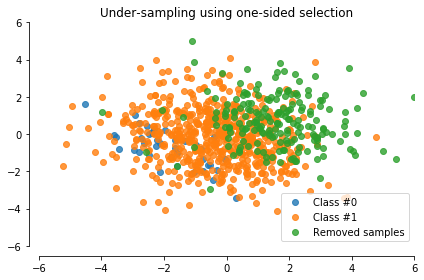

In [13]:
# This is a modified version of the code originally 
# written by Christos Aridas and Guillaume Lemaitre
# <g.lemaitre58@gmail.com>, released under the MIT
# License.

from imblearn.under_sampling import OneSidedSelection

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=1, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=800, random_state=10)

# To make visualisation easier.
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X)

# Apply One-Sided Selection
oss = OneSidedSelection(return_indices=True)

# Perform the sampling
X_resampled, y_resampled, idx_resampled = oss.fit_sample(X, y)

# Transform to 2D space.
X_res_vis = pca.transform(X_resampled)

# Create a plot...
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

idx_samples_removed = np.setdiff1d(np.arange(X_vis.shape[0]),
                                   idx_resampled)

idx_class_0 = y_resampled == 0
plt.scatter(X_res_vis[idx_class_0, 0], X_res_vis[idx_class_0, 1],
            alpha=.8, label='Class #0')
plt.scatter(X_res_vis[~idx_class_0, 0], X_res_vis[~idx_class_0, 1],
            alpha=.8, label='Class #1')
plt.scatter(X_vis[idx_samples_removed, 0], X_vis[idx_samples_removed, 1],
            alpha=.8, label='Removed samples')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.spines['left'].set_position(('outward', 10))
ax.spines['bottom'].set_position(('outward', 10))
ax.set_xlim([-6, 6])
ax.set_ylim([-6, 6])

# Show the plot
plt.title('Under-sampling using one-sided selection')
plt.legend()
plt.tight_layout()
plt.show()

Now we determine what classification performance is like, prior to applying OSS.

In [14]:
# Experiment 1c.

# First lets get our inputs together.
X_before = X
Y_before = y

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_before, Y_before, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - but look a the G-mean... thats poor!")
# You'll notice the custom results are more precise.   


Examples in training set:  400
Examples in testing set:  400
Dimensions of training set:  (400, 20)
Dimensions of testing set:  (400, 20)

Accuracy : 0.9375
Recall   : 0.970976253298
Precision: 0.96335078534
F1 Score : 0.96714848883

Custom accuracy:  0.9375
Recall   : 0.9633507853403142
Precision: 0.9709762532981531
F1 Score : 0.9671484888304862
G-mean   : 0.6120754990368699

 The outputs should match - but look a the G-mean... thats poor!


Now lets check what impact OSS had.

In [15]:
# Experiment 2c.

# Let's get our inputs together.
X_after  = X_resampled
Y_after  = y_resampled

# Now lets generate test and training sets from the data before
# random undersampling was applied. We use the function,
# train_test_split() to do this. The parameter test_size simply
# insicates what proportion of the data should be used for the
# training set. Here we simply say half in the training set, 
# half in the test set.

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X_after, Y_after, test_size=0.5)

print ('\nExamples in training set: ' , str(len(x_train)))
print ('Examples in testing set: ' , str(len(x_test)))
print ('Dimensions of training set: ' , str(np.asarray(x_train).shape))
print ('Dimensions of testing set: ' , str(np.asarray(x_test).shape)) 

from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()

# First train the classifier with call to fit.
classifier.fit(x_train, y_train)

# Now make some predcitions for the likely labels
# using the trained classifier.
y_predicted = classifier.predict(x_test)

# If we import some metrics we can evaluate the results.
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

print ("\nAccuracy :", accuracy_score(y_test,y_predicted))
print ("Recall   :", recall_score(y_test,y_predicted))
print ("Precision:", precision_score(y_test,y_predicted))
print ("F1 Score :", f1_score(y_test,y_predicted))

# Next we can get the confusion matrix:
cm = confusion_matrix(y_test,y_predicted)

# I have provided my own custom class that can be used to
# evaluate classifier performance. I use this now to verify the
# values obtained above, and to obtain the G-mean. This is a
# metric insensitive to the imbalance. This custom class expects a
# confusion matrix as an input, with the following formatting:
#                               
# [[TN   FN]
# [ FP  TP]]

# Import custom code
from EvaluationStats import ClassifierStats

# Create object
stats = ClassifierStats(cm)

# Print the results
print ("\nCustom accuracy: ", stats.getAccuracy())
print ("Recall   :", stats.getRecall())
print ("Precision:", stats.getPrecision())
print ("F1 Score :", stats.getfScore())
print ("G-mean   :", stats.getGMean())

print("\n The outputs should match - and the G-mean has improved.")
# You'll notice the custom results are more precise. 


Examples in training set:  304
Examples in testing set:  304
Dimensions of training set:  (304, 20)
Dimensions of testing set:  (304, 20)

Accuracy : 0.921052631579
Recall   : 0.958041958042
Precision: 0.958041958042
F1 Score : 0.958041958042

Custom accuracy:  0.9210526315789473
Recall   : 0.958041958041958
Precision: 0.958041958041958
F1 Score : 0.958041958041958
G-mean   : 0.5651082368425709

 The outputs should match - and the G-mean has improved.


Note that this time, the accuracy difference between the non-OSS and OSS results is only around 5%. Yet the G-mean has improved. That's a decent return for very little work.

### Artificial Examples
There are many approaches available for building artificial data points. Perhaps the most popular right now are Generative Adversarial Networks (GANs). For simplicity, I'm only going to discuss a single standard method here.

#### SMOTE
The Synthetic Minority Over-sampling Technique (SMOTE,Chawla et. al., 2002), inserts synthetically generated minority class examples (based on existing minority examples) in to a sampled data set. It odes this to balance the class distribution. SMOTE uses $k$-nearest neighbours to determine which nearby examples are most similar to a minority class example. 

The nearest neighbours are then used to generate a new synthetic example. This is done by first choosing a template minority class example, near which a new synthetic example should be generated. A random nearest neighbour of this template is then chosen. The features of the neighbouring example are combined with the features of the template, to form an entirely new example. This process is repeated until the required number of synthetic examples have been created. The synthetic examples are combined with the real minority examples to form a new training set. SMOTE ultimately balances the training set by under-sampling the majority class via random omission, until the desired $IR$ is reached.


<img src="images/png/SMOTE.png" width="200">

As before lets create some data. As for OSS, We'll use an imbalance ratio of 1 to 20, but this time generate 500 examples.


SMOTE Method:  SMOTE(k=None, k_neighbors=5, kind='regular', m=None, m_neighbors=10, n_jobs=1,
   out_step=0.5, random_state=None, ratio='auto', svm_estimator=None) 

Acc before    :  0.96400 Acc after    :  0.99579
Rec. before   :  0.96281 Rec. after   :  1.00000
Prec. before  :  1.00000 Prec. after  :  0.99184
F1 before     :  0.98105 F1 after     :  0.99590
G-mean before :  0.98123 G-mean after :  0.99568

SMOTE Method:  SMOTE(k=None, k_neighbors=5, kind='borderline1', m=None, m_neighbors=10,
   n_jobs=1, out_step=0.5, random_state=None, ratio='auto',
   svm_estimator=None) 

Acc before    :  0.98800 Acc after    :  0.99789
Rec. before   :  0.99578 Rec. after   :  1.00000
Prec. before  :  0.99160 Prec. after  :  0.99574
F1 before     :  0.99368 F1 after     :  0.99787
G-mean before :  0.91792 G-mean after :  0.99792

SMOTE Method:  SMOTE(k=None, k_neighbors=5, kind='borderline2', m=None, m_neighbors=10,
   n_jobs=1, out_step=0.5, random_state=None, ratio='auto',
   svm_estimator=Non

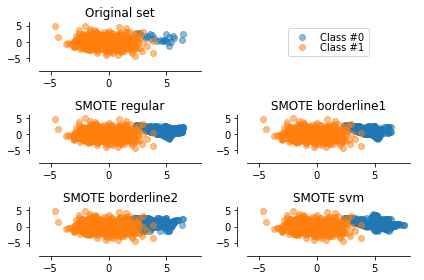

In [16]:
# This is a modified version of the code originally 
# written by Fernando Nogueira, Christos Aridas and 
# Guillaume Lemaitre <g.lemaitre58@gmail.com>,
# released under the MIT License.

# This function is used to produce a more complicated SMOTE plot.
def plot_resampling(ax, X, y, title):
    c0 = ax.scatter(X[y == 0, 0], X[y == 0, 1], label="Class #0", alpha=0.5)
    c1 = ax.scatter(X[y == 1, 0], X[y == 1, 1], label="Class #1", alpha=0.5)
    ax.set_title(title)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines['left'].set_position(('outward', 10))
    ax.spines['bottom'].set_position(('outward', 10))
    ax.set_xlim([-6, 8])
    ax.set_ylim([-6, 6])

    return c0, c1

from imblearn.over_sampling import SMOTE

# Generate the dataset
X, y = make_classification(n_classes=2, class_sep=2, weights=[0.05, 0.95],
                           n_informative=3, n_redundant=1, flip_y=0,
                           n_features=20, n_clusters_per_class=1,
                           n_samples=500, random_state=10)

# Instanciate a PCA object for the sake of easy visualisation
pca = PCA(n_components=2)
# Fit and transform x to visualise inside a 2D feature space
X_vis = pca.fit_transform(X)


# Note there a many varieties of SMOTE. I'll leave these
# here to play with. 
kind = ['regular', 'borderline1', 'borderline2', 'svm']


# Apply regular SMOTE
sm = [SMOTE(kind=k) for k in kind]

X_resampled = []
y_resampled = []
X_res_vis   = []

# Here we loop over all possible SMOTE Methods
for method in sm:
    
    # For each SMOTE method, apply and resample
    X_res, y_res = method.fit_sample(X, y)
    X_resampled.append(X_res)
    y_resampled.append(y_res)
    X_res_vis.append(pca.transform(X_res))
    
    # Because this code runs in a loop over all SMOTE
    # methods, we do the before and after experiments
    # pretty much together.
    ###########################
    # Get test/train splits
    ###########################
    # For experiment 1d
    X_before = X
    Y_before = y
    
    # For experiment 2d
    X_after = X_res
    Y_after = y_res
    
    from sklearn.model_selection import train_test_split
    
    examples_before_total = int(len(Y_before))
    examples_after_total  = int(len(Y_after))
    
    # For experiment 1d
    x_train_bef, x_test_bef, y_train_bef, y_test_bef = train_test_split(X_before, Y_before, test_size=0.5)
    
    # For experiment 2d
    x_train_aft, x_test_aft, y_train_aft, y_test_aft = train_test_split(X_after, Y_after, test_size=0.5)
    
    ###########################
    # Build classifiers
    ###########################
    from sklearn.naive_bayes import GaussianNB
    classifier_bef = GaussianNB()
    classifier_aft = GaussianNB()
    
    # Train the before data, and after data classifiers.
    classifier_bef.fit(x_train_bef, y_train_bef)
    classifier_aft.fit(x_train_aft, y_train_aft)
    
    ###########################
    # Make predictions
    ###########################
    # Now make some predcitions for the likely labels
    # using the trained classifier.
    y_predicted_bef = classifier_bef.predict(x_test_bef)
    y_predicted_aft = classifier_aft.predict(x_test_aft)
    from sklearn.metrics import confusion_matrix

    # Next we can get the confusion matrix:
    cm_bef = confusion_matrix(y_test_bef,y_predicted_bef)
    cm_aft = confusion_matrix(y_test_aft,y_predicted_aft)
    
    ###########################
    # Evaluate
    ###########################
    from EvaluationStats import ClassifierStats

    # Create object
    stats_bef = ClassifierStats(cm_bef)
    stats_aft = ClassifierStats(cm_aft)
    
    # Print the results
    print ("\nSMOTE Method: ", str(method),"\n")
    print ("Acc before    : ", '{0:.5f}'.format(stats_bef.getAccuracy()) ,"Acc after    : ",'{0:.5f}'.format(stats_aft.getAccuracy()))
    print ("Rec. before   : ", '{0:.5f}'.format(stats_bef.getRecall())   ,"Rec. after   : ",'{0:.5f}'.format(stats_aft.getRecall()))
    print ("Prec. before  : ", '{0:.5f}'.format(stats_bef.getPrecision()),"Prec. after  : ",'{0:.5f}'.format(stats_aft.getPrecision()))
    print ("F1 before     : ", '{0:.5f}'.format(stats_bef.getfScore())  ,"F1 after     : ",'{0:.5f}'.format(stats_aft.getfScore()))
    print ("G-mean before : ", '{0:.5f}'.format(stats_bef.getGMean())    ,"G-mean after : ",'{0:.5f}'.format(stats_aft.getGMean()))
  
    
    # Here we can evaluate all the SMOTE methods together,
    # before and after they've bee applied.

    
#############
# Plotting
#############

# Two subplots, unpack the axes array immediately
f, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2)
# Remove axis for second plot
ax2.axis('off')
ax_res = [ax3, ax4, ax5, ax6]

c0, c1 = plot_resampling(ax1, X_vis, y, 'Original set')

for i in range(len(kind)):
    plot_resampling(ax_res[i], X_res_vis[i], y_resampled[i],
                    'SMOTE {}'.format(kind[i]))

ax2.legend((c0, c1), ('Class #0', 'Class #1'), loc='center',
           ncol=1, labelspacing=0.)

plt.tight_layout()
plt.show()

Again we've improved the G-mean, and like with OSS, had little effect on the accuracy rate!

### Algorithms Robust to Imbalance
Some machine learning algorithms are more robust to imbalance than others. The decision tree is one such algorithm, depicted in the image below. It partitions the data space in such a way, that it overcomes some of the problems associated with disjuncts. I don't describe this algorithm here in detail, more detail can be found elsewhere (Bishop, 2006).


<img src="images/png/SplitPointTree.png" width="500">

Hopefully the examples provided thus far will help you get to grips with the imbalanced learning problem. Perhaps you’ll be able to apply the code to some of your own data.

## References

Bates S. D., Bailes M., Barsdell B. R., Bhat N. D. R., Burgay M., Burke-Spolaor S., Champion D. J., et al., 2012, *"The High Time Resolution Universe Pulsar Survey - VI. An artificial neural network and timing of 75 pulsars"*, MNRAS, 427, pp.1052-1065, [DOI:10.1111/j.1365-2966.2012.22042.x](https://dx.doi.org/10.1111/j.1365-2966.2012.22042.x).

Bishop C. M., 2006, *"Pattern Recognition and Machine Learning"*, Springer.

Chawla N.V., Bowyer K.W., Hall L.O., and Kegelmeyer W.P., 2002, *"SMOTE: Syn- thetic Minority Over-sampling Technique."*, Journal of Artificial Intelligence Research, 16(1), pp.321-357.

Gama J., Zliobaite I., Bifet A., Pechenizkiy M., Bouchachia A., 2014, *"A Survey on Concept Drift Adaptation"*, ACM Comput. Surv., vol.46(4), pp.44:1--44:37, [DOI:10.1145/2523813](https://dx.doi.org/10.1145/2523813).

He H. and Garcia E., 2009, *"Learning from Imbalanced Data"*, Knowledge and Data
Engineering, IEEE Transactions on, 21(9), pp.1263-1284.

Kubat M. and Matwin S., 1997, *"Addressing the Curse of Imbalanced Training Sets: One-Sided Selection."*, In Proceedings of the 14th International Conference on Machine Learning (ICML), pp.179-186.

Levin L., 2012, *"A search for radio pulsars: from millisecond pulsars to magnetars"*, PhD thesis, Swinburne University.

Lyon R. J., Stappers B. W., Cooper S., Brooke J. M., Knowles J.D., 2016, *"Fifty Years of Pulsar Candidate Selection: From simple filters to a new principled real-time classification approach"*, MNRAS, 459 (1):1104-1123, [DOI:10.1093/mnras/stw656](https://dx.doi.org/10.1093/mnras/stw656)

Lyon R. J., 2016, *"Why Are Pulsars Hard To Find?"*, PhD thesis, University of Manchester.

Thornton D., 2013, *"The High Time Resolution Radio Sky"*, PhD thesis, University of Manchester.

Tomek I., 1976, *“Two Modifications of CNN."*, Systems, Man and Cybernetics, IEEE Transactions on, SMC-6(11), pp.769-772.